### E-tivity 2

Your Name: Martina Ryan

Your Student ID Number: 20200692

Open a new Jupyter notebook and name it etivity2.ipynb. In your notebook, load bank.csv into a Pandas dataframe. Follow the examples and process in Lab 2 - Data Preparation.ipynb to prepare bank.csv for machine learning.

Ensure that you have:

- encoded all categorical attributes as numerical,

- filled in all missing values

- applied a scaler to rescale features

- treated outliers appropriately

- created at least one new feature from the existing ones


Shortly describe and Justify the data preparation choices you have taken in markdown cells. Aim at not having markdown cells longer than 2-3 lines of text.

In the end, save the prepared dataset as a CSV file on your hard disk.

### Import Python Modules and Dataset

In [539]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("./bank.csv")

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [541]:
# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [542]:
# Print last 5 rows of the dataframe
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [543]:
#Before we start transforming the dataset let's make a copy of it.
df_original = df

In [544]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [545]:
df.astype('object').describe().transpose()

count unique         top  freq
age         1988     68          33    95
job         1990     11  management   461
marital     2000      3     married  1111
education   1896      3   secondary   995
default     2000      2          no  1985
balance     2000   1274           0    86
housing     2000      2          no  1037
loan        2000      2          no  1750
contact     1809      2    cellular  1663
day         2000     31           8   204
month       2000     12         feb   404
duration    2000    655         200    12
campaign    2000     11           1  1063
pdays       2000    363          -1   454
previous    2000     26           0   454
poutcome    1546      3     failure   955
subscribed  2000      2         yes  1000

### 1. Encode Ordinal Categorical Attributes

In [546]:
# Create a mapper

scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single        1.0      no      127      no   no   
1997  81.0       retired  married        0.0      no     1154      no   no   
1998  46.0      services  married        0.0      no     4343     yes   no   
1999  40.0  entrepreneur  married        1.0      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

### B One-Hot Encode All Other Categorical Attributes

In [547]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job','contact','marital', 'education','poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

age default  balance housing loan  day month  duration  campaign  \
1995  20.0      no     2785      no   no   16   sep       327         2   
1996  28.0      no      127      no   no   16   sep      1334         2   
1997  81.0      no     1154      no   no   17   sep       231         1   
1998  46.0      no     4343     yes   no   20   sep       185         1   
1999  40.0      no     6403      no   no   22   sep       208         2   

      pdays  previous subscribed  job_blue-collar  job_entrepreneur  \
1995     -1         0        yes                0                 0   
1996     -1         0        yes                0                 0   
1997     -1         0        yes                0                 0   
1998     -1         0        yes                0                 0   
1999     -1         0        yes                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  job_nan  \
1995             0            1               0               0        0   
1996             0            0               0               0        0   
1997             0            0               0               0        0   
1998             1            0               0               0        0   
1999             0            0               0               0        0   

      contact_telephone  contact_nan  marital_married  marital_single  \
1995                  0            0                0               1   
1996                  0            0                0               1   
1997                  1            0                1               0   
1998                  0            1                1               0   
1999                  0            0                1               0   

      marital_nan  education_1.0  education_2.0  education_nan  \
1995            0              0              0              1   
1996            0              1              0              0   
1997            0              0              0              0   
1998            0              0              0              0   
1999            0              1              0              0   

      poutcome_other  poutcome_success  poutcome_nan  
1995               0                 0             1  
1996               0                 0             1  
1997               0                 0             1  
1998               0                 0             1  
1999               0                 0             1

In [548]:
# now one-hot encode all other categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0  32.0      392    1       957         2    131         2                0   
1  39.0      688    1       233         2    133         1                0   
2  59.0     1035    1       126         2    239         1                0   
3  47.0      398    1       274         1    238         2                1   
4  54.0     1004    1       479         1    307         1                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               0            0   
1                 0              0               0            0   
2                 0              0               0            1   
3                 0              0               0            0   
4                 0              0               0            1   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               1   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   

   job_unemployed  job_nan  contact_telephone  contact_nan  marital_married  \
0               0        0                  0            0                0   
1               0        0                  0            0                0   
2               0        0                  0            0                1   
3               0        0                  0            0                1   
4               0        0                  0            0                1   

   marital_single  marital_nan  education_1.0  education_2.0  education_nan  \
0               1            0              0              1              0   
1               0            0              1              0              0   
2               0            0              1              0              0   
3               0            0              1              0              0   
4               0            0              1              0              0   

   poutcome_other  poutcome_success  poutcome_nan  default_yes  housing_yes  \
0               0                 0             0            0            1   
1               0                 0             0            0            1   
2               0                 0             0            0            1   
3               0                 0             0            0            1   
4               0                 0             0            0            1   

   loan_yes  month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0         0          0          0          0          0          0          0   
1         1          0          0          0          0          0          0   
2         1          0          0          0          0          0          0   
3         1          0          0          0          0          0          0   
4         0          0          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  subscribed_yes  
0          0          0          0          0          0               0  
1          0          0          0          0          0               0  
2          0          0          0          0          0               0  
3          0          0          0          0          0               0  
4          0          0          0          0          0               0

The initial stage in data preparation is to convert all categorical attributes to numerical values. We can accomplish this by encoding categorical features in a single step. The category feature will be replaced by a list of binary features that reflect each of the categorical feature values. We treat categorical features with empty, or NaN, values differently: we generate a new feature for the NaN values and treat them as a categorical value in their own right.

### 2. Treatment of Missing Values in Numerical Columns

#### Check for Missing Values

It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In [549]:
# let's view the numerical features
df_numerical.head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0  32.0      392    1       957         2    131         2                0   
1  39.0      688    1       233         2    133         1                0   
2  59.0     1035    1       126         2    239         1                0   
3  47.0      398    1       274         1    238         2                1   
4  54.0     1004    1       479         1    307         1                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               0            0   
1                 0              0               0            0   
2                 0              0               0            1   
3                 0              0               0            0   
4                 0              0               0            1   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               1   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   

   job_unemployed  job_nan  contact_telephone  contact_nan  marital_married  \
0               0        0                  0            0                0   
1               0        0                  0            0                0   
2               0        0                  0            0                1   
3               0        0                  0            0                1   
4               0        0                  0            0                1   

   marital_single  marital_nan  education_secondary  education_tertiary  \
0               1            0                    0                   1   
1               0            0                    1                   0   
2               0            0                    1                   0   
3               0            0                    1                   0   
4               0            0                    1                   0   

   education_nan  poutcome_other  poutcome_success  poutcome_nan  default_yes  \
0              0               0                 0             0            0   
1              0               0                 0             0            0   
2              0               0                 0             0            0   
3              0               0                 0             0            0   
4              0               0                 0             0            0   

   housing_yes  loan_yes  month_aug  month_dec  month_feb  month_jan  \
0            1         0          0          0          0          0   
1            1         1          0          0          0          0   
2            1         1          0          0          0          0   
3            1         1          0          0          0          0   
4            1         0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_sep  subscribed_yes  
0          0               0  
1          0               0  
2          0               0  
3          0               0  
4          0               0

In [550]:
#Check to see what data might be missing
df.isna().sum()

age                  12
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
job_nan               0
contact_telephone     0
contact_nan           0
marital_married       0
marital_single        0
marital_nan           0
education_1.0         0
education_2.0         0
education_nan         0
poutcome_other        0
poutcome_success      0
poutcome_nan          0
default_yes           0
housing_yes           0
loan_yes              0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct       

### Impute Missing Values

There are numerous ways to impute (i.e., fill in) the missing values in a numerical column, e.g. column Age – the simplest being replacement by mean, which can be done with the following code: 

df['Age'].fillna(df['Age'].mean(), inplace=True)

Imputing missing values with the mean (alternatively, the media, the most frequent, or a constant) may introduce bias in the dataset. A better method is to build an ML model (typically, kNN) to predict Age on the basis of other columns.

Since, the purpose now is to practice data munging prior applying ML algorithms, we can take an approach, which lies somewhere in between these 2 extremes. We may hypothesise that attributes Marital and Housing combined can give a good estimate of Age.

First, let us look at the following boxplots to see if a trend exists:

In [551]:
 # let's view the numerical features
df_numerical.head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0  32.0      392    1       957         2    131         2                0   
1  39.0      688    1       233         2    133         1                0   
2  59.0     1035    1       126         2    239         1                0   
3  47.0      398    1       274         1    238         2                1   
4  54.0     1004    1       479         1    307         1                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               0            0   
1                 0              0               0            0   
2                 0              0               0            1   
3                 0              0               0            0   
4                 0              0               0            1   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               1   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   

   job_unemployed  job_nan  contact_telephone  contact_nan  marital_married  \
0               0        0                  0            0                0   
1               0        0                  0            0                0   
2               0        0                  0            0                1   
3               0        0                  0            0                1   
4               0        0                  0            0                1   

   marital_single  marital_nan  education_secondary  education_tertiary  \
0               1            0                    0                   1   
1               0            0                    1                   0   
2               0            0                    1                   0   
3               0            0                    1                   0   
4               0            0                    1                   0   

   education_nan  poutcome_other  poutcome_success  poutcome_nan  default_yes  \
0              0               0                 0             0            0   
1              0               0                 0             0            0   
2              0               0                 0             0            0   
3              0               0                 0             0            0   
4              0               0                 0             0            0   

   housing_yes  loan_yes  month_aug  month_dec  month_feb  month_jan  \
0            1         0          0          0          0          0   
1            1         1          0          0          0          0   
2            1         1          0          0          0          0   
3            1         1          0          0          0          0   
4            1         0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_sep  subscribed_yes  
0          0               0  
1          0               0  
2          0               0  
3          0               0  
4          0               0

In [552]:
df_missing_age = df_original[(df_original.age.isnull())]
df_missing_age.describe()

age  education      balance        day    duration   campaign  \
count  0.0    12.0000    12.000000  12.000000   12.000000  12.000000   
mean   NaN     1.5000   987.166667  18.916667  285.916667   2.833333   
std    NaN     0.6742   951.083099  11.285214  175.201940   2.918073   
min    NaN     0.0000   -61.000000   3.000000   41.000000   1.000000   
25%    NaN     1.0000   253.250000   8.250000  136.500000   1.000000   
50%    NaN     2.0000   695.500000  23.500000  324.000000   1.500000   
75%    NaN     2.0000  1461.750000  29.000000  398.500000   3.250000   
max    NaN     2.0000  2812.000000  30.000000  537.000000  11.000000   

            pdays   previous  
count   12.000000  12.000000  
mean   175.000000   2.250000  
std     69.553119   1.712255  
min     -1.000000   0.000000  
25%    171.000000   1.000000  
50%    186.500000   1.500000  
75%    214.250000   3.250000  
max    261.000000   5.000000

In [553]:
# get a list of categorical features with NaNs
numerical_nans_cols = df_numerical.columns[df_numerical.isna().any()].tolist()
for col in numerical_nans_cols:
    nan_cnt = df[col].isna().sum()
    tot_cnt = df[col].size
    print("Numerical feature '{:s}' contains {:d} NaNs ({:0.1f}%)".format(col, nan_cnt, (100*nan_cnt/tot_cnt)))    

Numerical feature 'age' contains 12 NaNs (0.6%)


<Figure size 1440x576 with 0 Axes>

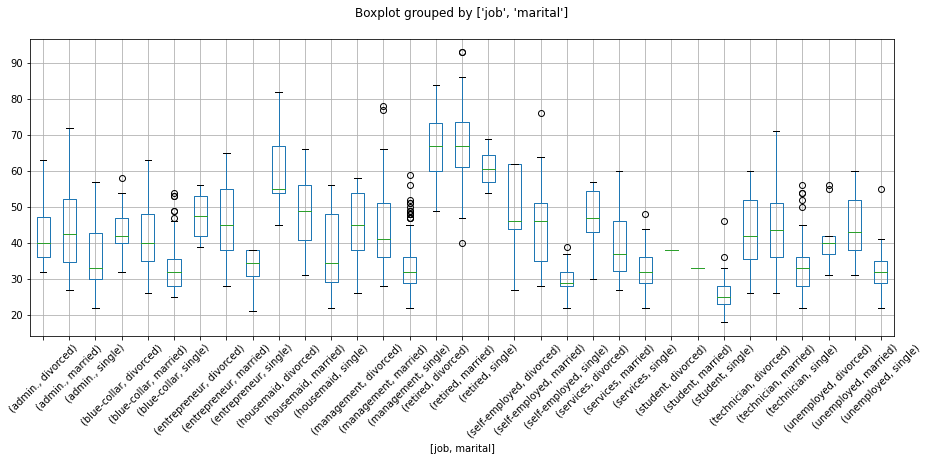

In [554]:
# looking to see if a trend for 'age' exists based upon features 'job' and 'marital'
plt.rcParams["figure.figsize"] = (15,5.5)
plt.figure(figsize=(20,8))
df_original.boxplot(column='age', by=['job','marital'], rot=45)
plt.title("")
plt.show() 

 We can see some variation in the median of Age for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups.

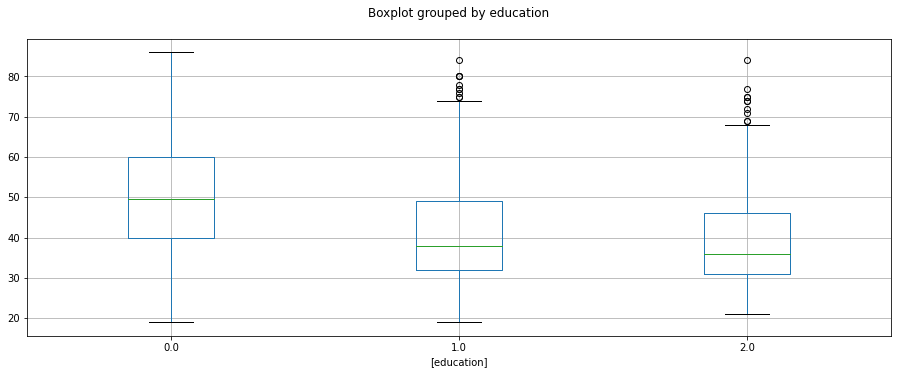

In [555]:
df_original.boxplot(column='age', by=['education'])
plt.title("")
plt.show()

In [556]:
# Create a pivot table which contains the median values for each combination of 'job' and 'marital' values
ptable = df_original.pivot_table(values='age', index='job', columns='marital', aggfunc=np.median)
ptable

marital        divorced  married  single
job                                     
admin.             40.0     42.5    33.0
blue-collar        42.0     40.0    32.0
entrepreneur       47.5     45.0    34.5
housemaid          55.0     49.0    34.5
management         45.0     41.0    32.0
retired            67.0     67.0    60.5
self-employed      46.0     46.0    29.0
services           47.0     37.0    32.0
student            38.0     33.0    25.0
technician         42.0     43.5    33.0
unemployed         40.0     43.0    32.0

 Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of Age.

In [557]:
# Define a function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job'], x['marital']]

# Replace missing values in the 'age' column using the corresponding median value in the pivot table
df['age'].fillna(df_original[df_original['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [558]:
# Review the original entries with 'age' equals NaN
df_original[df_original['age'].isna()].head()

age            job  marital  education default  balance housing loan  \
456  NaN  self-employed  married        2.0      no      917      no   no   
472  NaN    blue-collar  married        0.0      no      474     yes  yes   
526  NaN       services  married        1.0      no     2478     yes   no   
595  NaN     management  married        2.0      no     1857      no   no   
597  NaN  self-employed  married        1.0     yes      254     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome  \
456   cellular    6   feb       518         3    212         5  failure   
472  telephone    9   feb       152         3    221         1  failure   
526   cellular   28   jan       347         1    230         1  failure   
595   cellular   29   jan       386         1    168         4  failure   
597   cellular   29   jan       194         1    188         1  failure   

    subscribed  
456         no  
472         no  
526         no  
595         no  
597         no

In [559]:
# Check the imputed entries that have been populated from the pivot table
df[df_original['age'].isna()].head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
456  46.0      917    6       518         3    212         5                0   
472  40.0      474    9       152         3    221         1                1   
526  37.0     2478   28       347         1    230         1                0   
595  41.0     1857   29       386         1    168         4                0   
597  46.0      254   29       194         1    188         1                0   

     job_entrepreneur  job_housemaid  job_management  job_retired  \
456                 0              0               0            0   
472                 0              0               0            0   
526                 0              0               0            0   
595                 0              0               1            0   
597                 0              0               0            0   

     job_self-employed  job_services  job_student  job_technician  \
456                  1             0            0               0   
472                  0             0            0               0   
526                  0             1            0               0   
595                  0             0            0               0   
597                  1             0            0               0   

     job_unemployed  job_nan  contact_telephone  contact_nan  marital_married  \
456               0        0                  0            0                1   
472               0        0                  1            0                1   
526               0        0                  0            0                1   
595               0        0                  0            0                1   
597               0        0                  0            0                1   

     marital_single  marital_nan  education_1.0  education_2.0  education_nan  \
456               0            0              0              1              0   
472               0            0              0              0              0   
526               0            0              1              0              0   
595               0            0              0              1              0   
597               0            0              1              0              0   

     poutcome_other  poutcome_success  poutcome_nan  default_yes  housing_yes  \
456               0                 0             0            0            0   
472               0                 0             0            0            1   
526               0                 0             0            0            1   
595               0                 0             0            0            0   
597               0                 0             0            1            1   

     loan_yes  month_aug  month_dec  month_feb  month_jan  month_jul  \
456         0          0          0          1          0          0   
472         1          0          0          1          0          0   
526         0          0          0          0          1          0   
595         0          0          0          0          1          0   
597         1          0          0          0          1          0   

     month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
456          0          0          0          0          0          0   
472          0          0          0          0          0          0   
526          0          0          0          0          0          0   
595          0          0          0          0          0          0   
597          0          0          0          0          0          0   

     subscribed_yes  
456               0  
472               0  
526               0  
595               0  
597               0

In [560]:
df.to_csv('bank_intermediate.csv')

There are no columns with more than 25% missing values. As a result, we don't need to worry about removing entire columns. The 'age' attribute is the only numerical feature with missing data. When plotting this feature in a boxplot clustered by the 'job' and'marital' characteristics, we can see a lot of fluctuation in the median of 'age.' We take advantage of this variation by using these medians to infer missing 'age' values based on the accompanying row's 'job' and'marital' feature values.

### 3. Rescaling Features

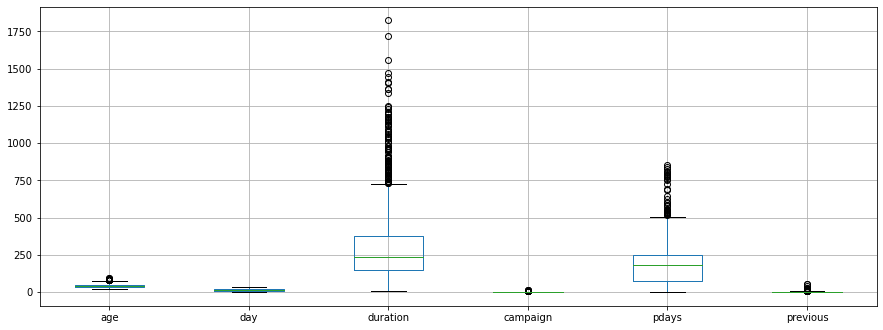

<AxesSubplot:>

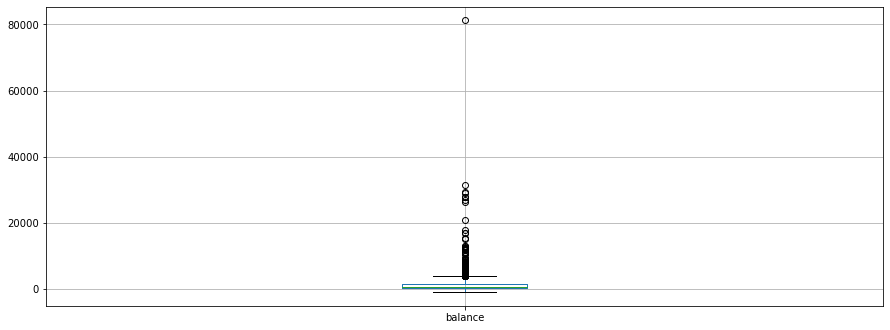

In [561]:
df.boxplot(column=[ 'age','day','duration','campaign','pdays','previous',])
plt.show()
df.boxplot(column=['balance'])

In [562]:
robust_scaler = RobustScaler()
df[['pdays','duration','balance']] = robust_scaler.fit_transform(df[['pdays','duration','balance']])

To change pdays, duration, and balance, I used RobustScaler. As demonstrated in the box plots, RobustScaler does a fantastic job of rescaling these columns, which feature large outliers and the end result is given below.

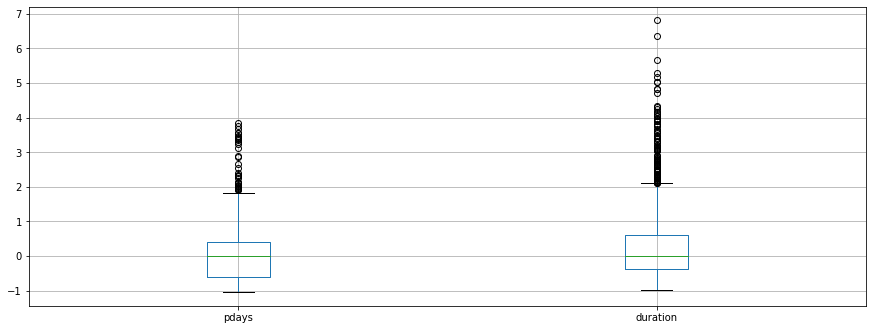

<AxesSubplot:>

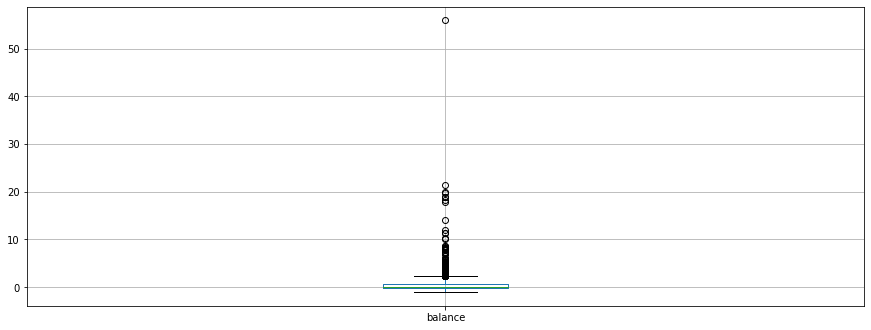

In [563]:
df.boxplot(column=[ 'pdays','duration'])
plt.show()
df.boxplot(column=[ 'balance'])

In [564]:
MinMaxScaler_scaler = MinMaxScaler()
df[['campaign']] = MinMaxScaler_scaler.fit_transform(df[['campaign']])
df[['age']] = MinMaxScaler_scaler.fit_transform(df[['age']])

As seen, there are no noteworthy outliers in terms of campaign or age. A gaussian distribution is provided by age. In terms of the campaign, there isn't much that can be done to make the distribution more gaussian. To change values to be between 0 and 1, MinMax scaling is utilized.

### 4. Treatment of Outliers

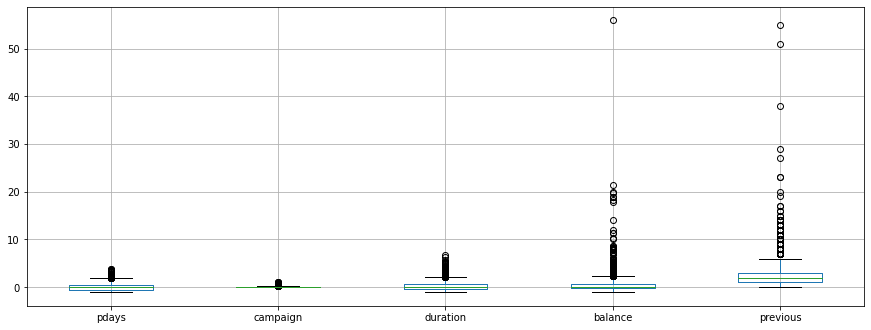

In [565]:
df.boxplot(column=[ 'pdays','campaign','duration','balance','previous'])
plt.show()

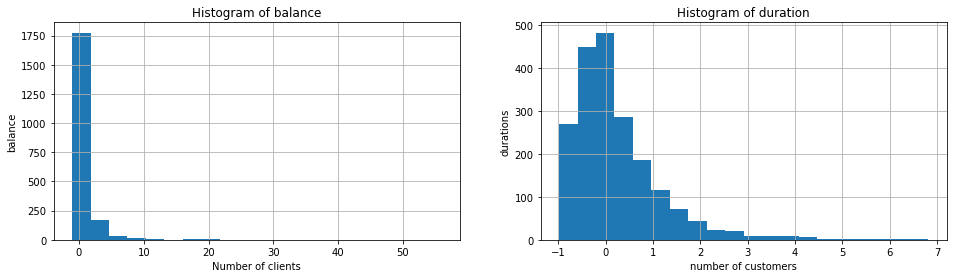

In [566]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('Number of clients')
ax1.set_ylabel('balance')
df['balance'].hist(bins=20)
# Plot ApplicantIncome

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of duration")
ax3.set_xlabel('number of customers')
ax3.set_ylabel('durations')
df['duration'].hist(bins=20)

plt.show()

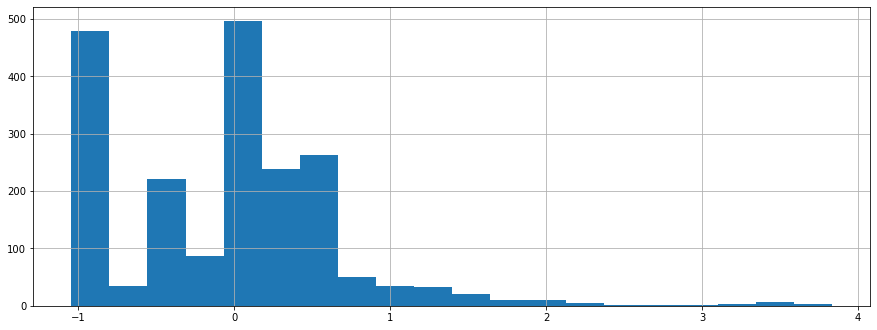

In [567]:
df['pdays'].hist(bins=20)
plt.show()

In [568]:
 df[['balance', 'duration','pdays']].min()

balance    -1.060984
duration   -0.982833
pdays      -1.044223
dtype: float64

The duration and balance are tilted to the left. A log transformation is used to alter this and make the distribution more even, as well as to cope with outliers. Pdays has a left-hand tail that can be enhanced with a log transform. Increasing the gaussianity of the data.

 Here we are have chosen to shift the values to the interval  [1,+∞]  before applying a log transformation.

In [569]:
#Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.06)
df['duration'] = np.log(df['duration']+1.99)
df['pdays'] = np.log(df['pdays']+2.04)

Let's plot again.

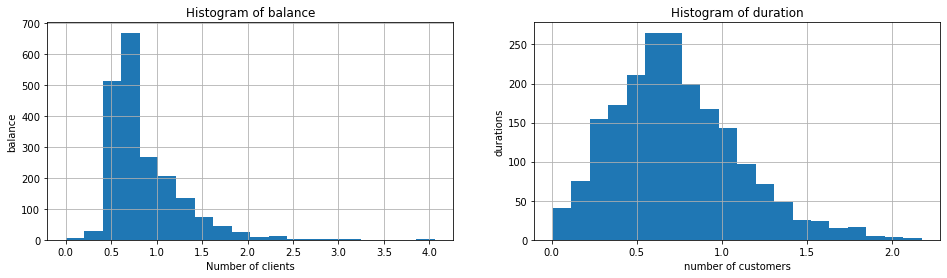

In [570]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('Number of clients')
ax1.set_ylabel('balance')
df['balance'].hist(bins=20)
# Plot ApplicantIncome

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of duration")
ax3.set_xlabel('number of customers')
ax3.set_ylabel('durations')
df['duration'].hist(bins=20)

plt.show()

The altered features are less skewed and the distributions are more normal than the original features, as can be seen.

Let's examine the distribution of values in pdays.

In [571]:
df['balance'].value_counts()

0.517696    86
0.518109     9
0.624147     8
0.635590     7
0.676580     6
            ..
2.292386     1
0.521406     1
1.040005     1
0.367843     1
0.412867     1
Name: balance, Length: 1274, dtype: int64

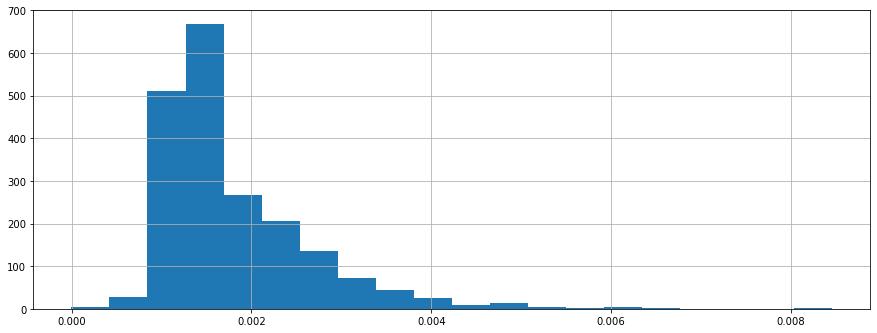

In [572]:
df['balance'] = df['balance']/480
df['balance'].hist(bins=20)
plt.show()

The transformed feature is less skewed and has a distribution that is closer to normal than the original feature Balance, as shown in this histogram.

### 5. Creation of Derived Features

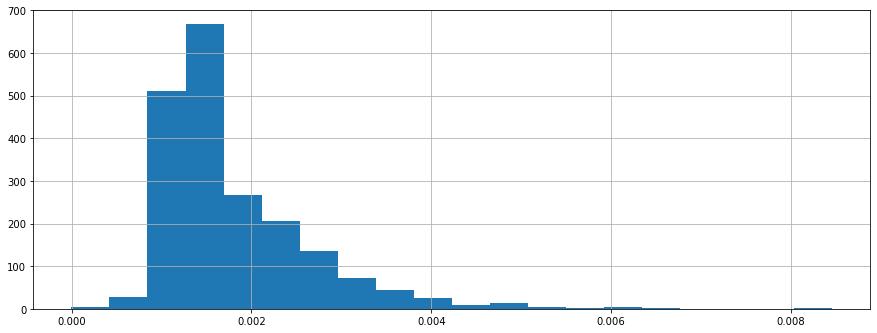

In [573]:
df['balance'].hist(bins=20)
plt.show()

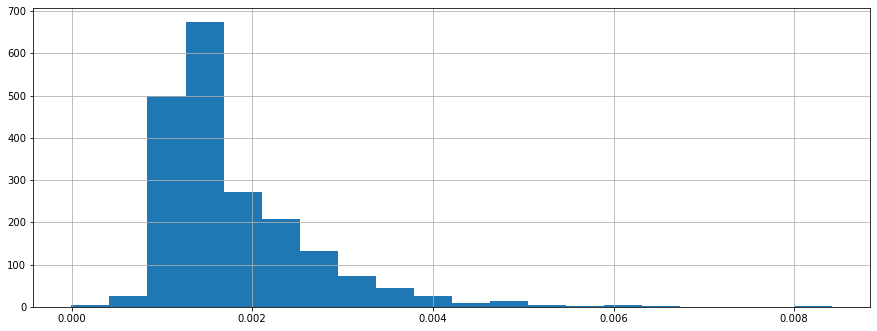

In [574]:
np.log(df['balance']+1).hist(bins=20)
plt.show()

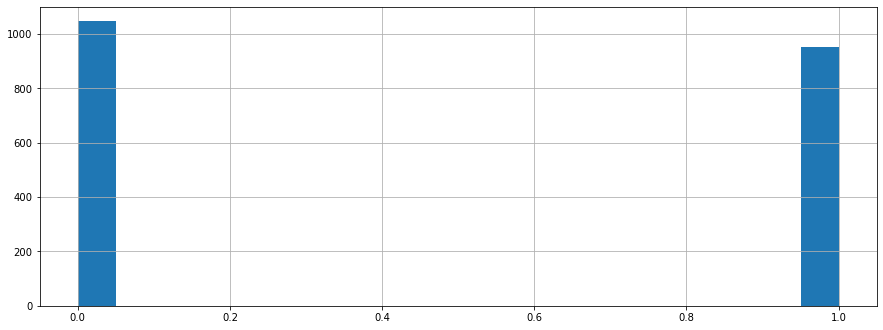

In [575]:
# Create financial independent column and apply a log transformation
df['financial_independent'] = np.where((df['balance']> 0) & ( df['housing_yes']==0) & ( df['loan_yes']==0) & ( df['default_yes']==0), 1, 0)
df['financial_independent'].hist(bins=20)
plt.show()

In [576]:
df.corr()['subscribed_yes'].nlargest(3)

subscribed_yes           1.000000
financial_independent    0.589652
poutcome_success         0.510117
Name: subscribed_yes, dtype: float64

In [577]:
df['new_contact'] = np.where(df_original['pdays']== -1, 1, 0)

In [578]:
df.corr()['subscribed_yes'].nlargest(15)

subscribed_yes           1.000000
financial_independent    0.589652
poutcome_success         0.510117
duration                 0.459258
month_jul                0.301840
month_aug                0.270114
month_sep                0.267976
balance                  0.239540
month_jun                0.234206
month_oct                0.206587
job_retired              0.201587
job_student              0.182442
day                      0.153196
poutcome_nan             0.145622
new_contact              0.145622
Name: subscribed_yes, dtype: float64

Financial independent is a new feature, this indicates whether or not the client owes money. This can provide valuable insight into the client's borrowings and the financial stress they're under. As demonstrated above, this yields the strongest correlation for subscription at .589652.

Let's drop day.

In [579]:
df.drop('day', axis=1, inplace=True)

The month column give more relevant information than the column day of the month, which does not provide any essential details. As a result, the day column is no longer relevant, so is now dropped. 

In [520]:
# save the prepared dataset back out to a .csv file
df.to_csv('bank_prepared.csv')

### Reflection:

Was having a busy week, so hadn't had a chance to do any forum posts and only really got working on this etivity at the weekend.  I will try to manage my time better going forward.  
Steps I followed for this etivity - viewed the data first before transforming it, created a mapper for education and then used one-hot encode the categorical columns with NaNs.  Checked for missing data and the 'age' attribute is the only numerical feature with missing data. We can see some variation in the median of Age for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups. Next step was Rescalling features, to change pdays, duration, and balance, I used RobustScaler. As demonstrated in the box plots, RobustScaler does a fantastic job of rescaling these columns, which feature large outliers,

Balance and duration had some outliers, a log transformation is used to alter this and make the distribution more even, as well as to cope with outliers. Pdays has a left-hand tail that can be enhanced with a log transform. Increasing the gaussianity of the data. I created the financially independent feature, which indicates whether or not the client owens money. This can provide valuable insight into the client's borrowings and the financial stress they're under. It has the strongest correlation at .589652. The month column give more relevant information than the column day of the month, which does not provide any essential details. As a result, the day column is no longer relevant, so is now dropped. 